<a href="https://colab.research.google.com/github/MaldoAlberto/arithmetics-circutis-in-qiskit/blob/master/Reversible_Addition_on_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate the operator  reversible Addiction  in qiskit from the article "Addition on a Quantum Computer" of Thomas G. DraperWritten: September 1, 1998.


In [12]:
!pip install qiskit

In [13]:
import qiskit
qiskit.__version__

'0.14.1'

In [0]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

Generate the gate Carrie:

In [0]:
def carrie(circuit,a,b,c,d):
  circuit.toffoli(b,c,d)
  circuit.cx(b,c)
  circuit.toffoli(a,c,d)

Generate the gate Sum:

In [0]:
def plus(circuit,a,b,c):
  circuit.cx(b,c)
  circuit.cx(a,c)

Design the simulation for 3-bits 

In [0]:
simulator = Aer.get_backend('qasm_simulator')
circuit = QuantumCircuit(10, 4)

#preprocessing (superposition the input variables)

circuit.h(1)
circuit.h(2)

circuit.h(4)
circuit.h(5)

circuit.h(7)
circuit.h(8)

# generate circuit

carrie(circuit,0,1,2,3)

carrie(circuit,3,4,5,6)

carrie(circuit,6,7,8,9)
circuit.cx(7,8)
plus(circuit,6,7,8)

carrie(circuit,3,4,5,6)
plus(circuit,3,4,5)

carrie(circuit,0,1,2,3)
plus(circuit,0,1,2)

circuit.measure([2,5,8,9], [0,1,2,3])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100000)
result = job.result()
counts = result.get_counts(circuit)

Show the circuit

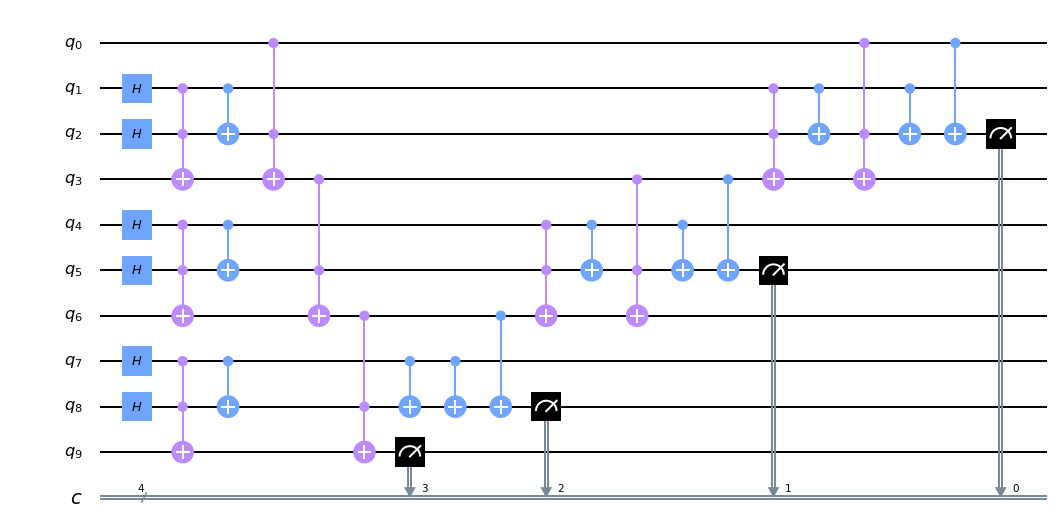

In [18]:
%matplotlib inline
circuit.draw(output = "mpl")

Show the results in a histogram

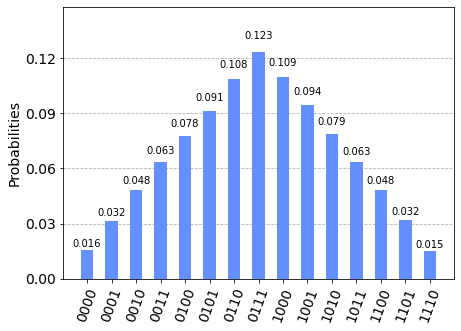

In [19]:
plot_histogram(counts)